1. Import the Dataset & Explore Basic Info

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")  # Replace with actual path if needed

# Basic info
print(df.head())  # First 5 rows
print(df.info())  # Column data types and non-null counts
print(df.describe())  # Summary stats for numeric columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2. Handle Missing Values (Mean/Median/Imputation)

In [15]:
# Handle missing values correctly (no FutureWarning)
df['Age'] = df['Age'].fillna(df['Age'].median())              # Age → fill with median
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())             # Fare → fill with mean
df['Cabin'] = df['Cabin'].fillna('Unknown')                   # Cabin → fill with 'Unknown'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Embarked → fill with mode

# Verify if missing values have been filled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


3.Convert categorical features into numerical using encoding.

In [55]:
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Step 2: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify if missing values have been filled
print(df.isnull().sum())

# Step 3: Convert categorical columns to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


# Step 4: Ticket Prefix (non-numeric part)
df['TicketPrefix'] = df['Ticket'].apply(lambda x: ''.join([char for char in x if not char.isdigit()]).strip() or 'None')

# Step 5: Ticket Number (numeric part)
df['TicketNumber'] = df['Ticket'].apply(lambda x: ''.join([char for char in x if char.isdigit()]) or '0').astype(int)

# Step 6: Convert TicketPrefix into numeric codes
df['TicketPrefix'] = df['TicketPrefix'].astype('category').cat.codes

# Step 7: Convert Cabin to numeric (first letter)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df['Cabin'] = df['Cabin'].map({
    'A': 1, 'B': 2, 'C': 3, 'D': 4,
    'E': 5, 'F': 6, 'G': 7, 'T': 8,
    'U': 0
})

# Step 8: Drop the original Ticket column
df.drop('Ticket', axis=1, inplace=True)

# Step 9: Drop the original Name column
df.drop('Name', axis=1, inplace=True)

# Step 10: Verify the dataframe
print(df.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    0  22.0      1      0   7.2500      0   
1            2         1       1    1  38.0      1      0  71.2833      3   
2            3         1       3    1  26.0      0      0   7.9250      0   
3            4         1       1    1  35.0      1      0  53.1000      3   
4            5         0       3    0  35.0      0      0   8.0500      0   

   Embarked  TicketPrefix  TicketNumber  
0         0             3        521171  
1         1            17         17599  
2         0            37      23101282  
3         0            15        113803  
4         0            15        373450  


In [56]:
print(df.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin             int64
Embarked          int64
TicketPrefix       int8
TicketNumber      int64
dtype: object


4.Normalize/standardize the numerical features.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first 5 rows of the updated DataFrame
print(df[numerical_cols].head())


   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0     0.000000       0.0     1.0  0.0  0.271174  0.125    0.0  0.014151   
1     0.001124       1.0     0.0  1.0  0.472229  0.125    0.0  0.139136   
2     0.002247       1.0     1.0  1.0  0.321438  0.000    0.0  0.015469   
3     0.003371       1.0     0.0  1.0  0.434531  0.125    0.0  0.103644   
4     0.004494       0.0     1.0  0.0  0.434531  0.000    0.0  0.015713   

   Cabin  Embarked  TicketNumber  
0  0.000       0.0      0.022560  
1  0.375       0.5      0.000762  
2  0.000       0.0      0.999999  
3  0.375       0.0      0.004926  
4  0.000       0.0      0.016166  


 5.Visualize outliers using boxplots and remove them

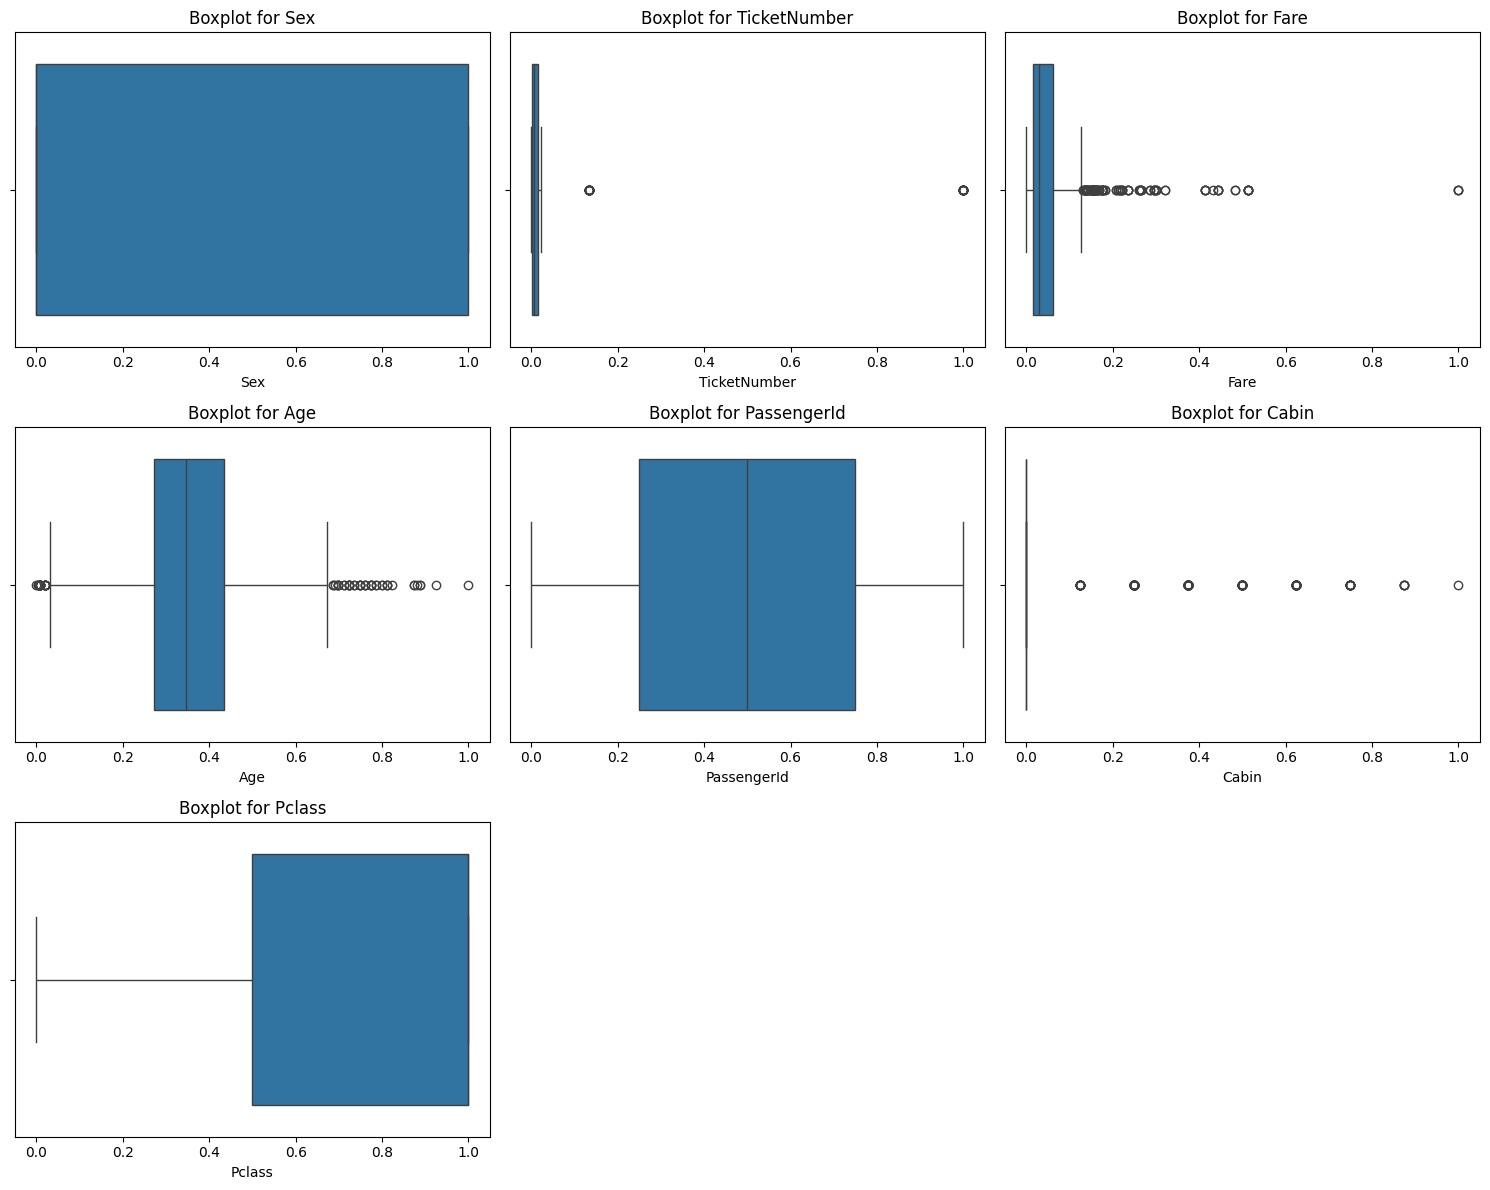

Shape after removing outliers: (572, 12)


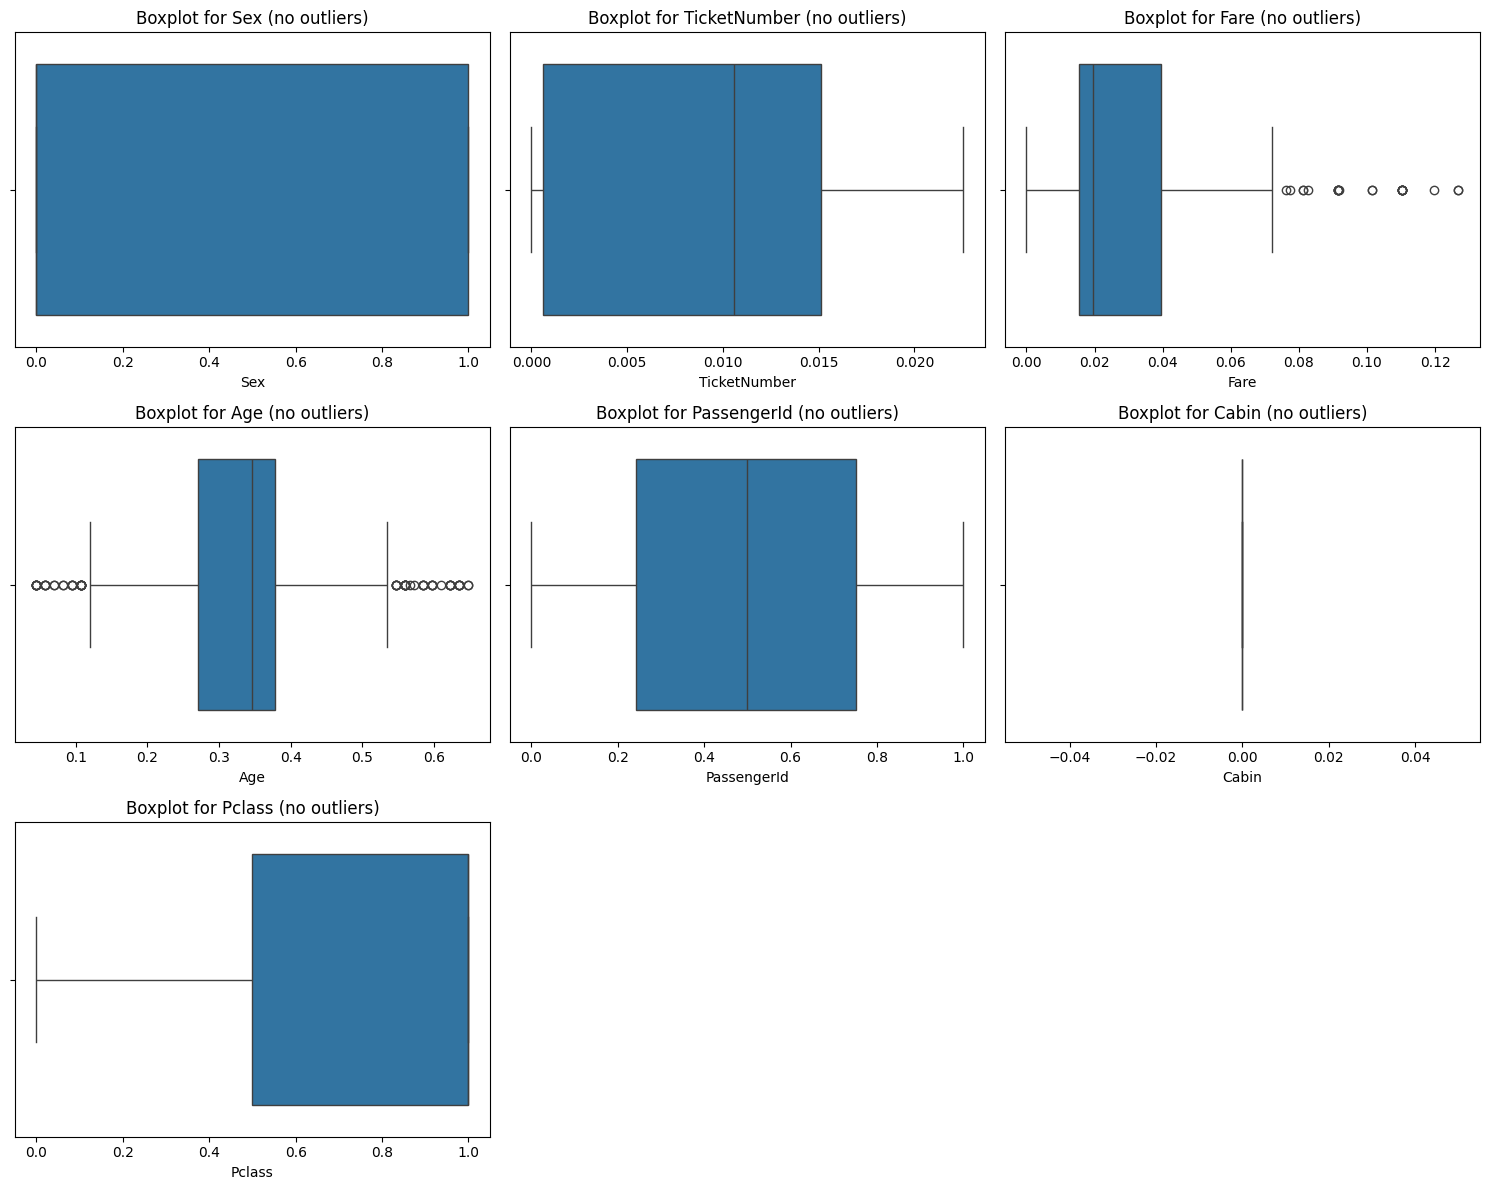

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of most important numeric columns (based on the previous feature importance output)
important_numerical_cols = ['Sex', 'TicketNumber', 'Fare', 'Age', 'PassengerId', 'Cabin', 'Pclass']

# Step 1: Visualize outliers using boxplots for important numeric columns
plt.figure(figsize=(15, 5 * len(important_numerical_cols) // 3 + 1))  # Adjust the figure size based on the number of rows
for i, col in enumerate(important_numerical_cols, 1):
    plt.subplot(len(important_numerical_cols) // 3 + 1, 3, i)  # Dynamically assign subplots
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

# Step 2: Remove outliers using IQR method for important numeric columns
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers for the important numeric columns
df_no_outliers = remove_outliers(df, important_numerical_cols)

# Verify the shape after removing outliers
print(f"Shape after removing outliers: {df_no_outliers.shape}")

# Optional: Visualize again after removing outliers for important numeric columns
plt.figure(figsize=(15, 5 * len(important_numerical_cols) // 3 + 1))  # Adjust the figure size based on the number of rows
for i, col in enumerate(important_numerical_cols, 1):
    plt.subplot(len(important_numerical_cols) // 3 + 1, 3, i)  # Dynamically assign subplots
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot for {col} (no outliers)")

plt.tight_layout()
plt.show()



Feature Selection for selecting the most important columns

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = df.drop('Survived', axis=1)  # Assuming 'Survived' is the target
y = df['Survived']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view importance of features
features = X.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


         Feature  Importance
2            Sex    0.234786
10  TicketNumber    0.165017
6           Fare    0.129935
3            Age    0.129174
0    PassengerId    0.128582
7          Cabin    0.054531
1         Pclass    0.052699
9   TicketPrefix    0.029841
4          SibSp    0.029726
5          Parch    0.023857
8       Embarked    0.021853


1. What are the different types of missing data?
Missing data can be classified into three main types:

Missing Completely at Random (MCAR): The missingness is unrelated to any observed or unobserved data. The missing data occurs randomly.

Missing at Random (MAR): The missingness is related to observed data but not the missing values themselves. For example, people with higher incomes might be less likely to answer a survey question, but this is based on income, not on the value itself.

Missing Not at Random (MNAR): The missingness is related to the value of the data itself. For example, a person with a low salary might not report it because they are ashamed of the value.

2. How do you handle categorical variables?
Label Encoding: Convert categorical labels into numeric values. Each category gets assigned a unique integer.

One-Hot Encoding: Create binary columns for each category. If a sample belongs to a category, it gets a 1 in the corresponding column, otherwise 0.

Ordinal Encoding: For ordinal variables where there is a clear ranking, you can assign numeric values according to the order of categories.

Target Encoding: Categorical variables are encoded based on the mean of the target variable for each category.

3. What is the difference between normalization and standardization?
Normalization: This scales the data into a fixed range, typically [0, 1]. It is often used when you want to make all features comparable on a common scale.

Formula:
𝑥
−
min
⁡
(
𝑥
)
max
⁡
(
𝑥
)
−
min
⁡
(
𝑥
)
max(x)−min(x)
x−min(x)
​


Standardization: This scales the data to have a mean of 0 and a standard deviation of 1. It’s useful when the distribution of data is not known, and features might have different units.

Formula:
𝑥
−
𝜇
𝜎
σ
x−μ
​
 , where
𝜇
μ is the mean and
𝜎
σ is the standard deviation.

4. How do you detect outliers?
Visual Methods:

Boxplot: Outliers are points that lie outside the whiskers (1.5 times the IQR).

Scatter Plot: Outliers can appear as distant points from the majority of the data.

Statistical Methods:

Z-Score: Data points with a Z-score greater than 3 or less than -3 are often considered outliers.

IQR (Interquartile Range): Data points outside 1.5 times the IQR (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR) are considered outliers.

5. Why is preprocessing important in ML?
Preprocessing is crucial because it ensures that the data is clean, consistent, and well-structured before training a machine learning model. Without proper preprocessing:

Models may not perform optimally due to issues like missing values, outliers, or improperly scaled data.

Features may not be comparable or may have unintended biases.

It improves model convergence and accuracy, especially for models sensitive to scale, such as gradient descent-based algorithms.

6. What is one-hot encoding vs label encoding?
One-Hot Encoding: This creates binary columns for each category and marks a 1 for the category present in the sample and 0 for others. It works well for nominal variables with no ordinal relationship.

Example: For the feature Color = [Red, Blue, Green], after one-hot encoding, you get three columns: Red, Blue, Green with 1s and 0s.

Label Encoding: This converts each category into a unique integer. It’s suitable for ordinal data where there is an inherent order (e.g., Low, Medium, High).

Example: For Color = [Red, Blue, Green], after label encoding, you might get 0, 1, 2.

7. How do you handle data imbalance?
Resampling Methods:

Oversampling: Increase the number of instances of the minority class by duplicating examples or generating synthetic samples (e.g., using SMOTE).

Undersampling: Reduce the number of instances of the majority class to balance the dataset.

Class Weights: Assign higher weights to the minority class in the model’s loss function to make the model pay more attention to the minority class.

Anomaly Detection: For highly imbalanced datasets, consider treating the minority class as an anomaly and use anomaly detection techniques.

Use Different Evaluation Metrics: Instead of accuracy, use metrics like F1-score, precision, recall, or ROC-AUC to evaluate model performance on imbalanced data.

8. Can preprocessing affect model accuracy?
Yes, preprocessing can have a significant impact on model accuracy. If the data is not appropriately cleaned, scaled, or transformed, the model might struggle to make accurate predictions. For instance:

Missing values can lead to biased results if not handled properly.

Incorrect handling of categorical variables can affect the model’s ability to learn patterns.

Features with different scales can cause models (like k-NN or gradient descent-based models) to perform poorly.

Outliers can distort the model’s learning process.